In this competition your task will be to predict the probability for a tutor to be a proper one for preparing for the math exam. You will be given two datasets: train.csv (contains all features and the target) and test.csv (only features).

Ваша задача этом соревновании - предсказать вероятность того, подойдет ли репетитор для подготовки к экзамену по математике. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns

In [10]:
!!pip install seaborn

['Requirement already satisfied: seaborn in c:\\users\\samsung\\miniconda3\\lib\\site-packages (0.11.0)',
 'Requirement already satisfied: numpy>=1.15 in c:\\users\\samsung\\miniconda3\\lib\\site-packages (from seaborn) (1.19.2)',
 'Requirement already satisfied: pandas>=0.23 in c:\\users\\samsung\\miniconda3\\lib\\site-packages (from seaborn) (1.1.3)',
 'Requirement already satisfied: scipy>=1.0 in c:\\users\\samsung\\miniconda3\\lib\\site-packages (from seaborn) (1.5.2)',
 'Requirement already satisfied: matplotlib>=2.2 in c:\\users\\samsung\\miniconda3\\lib\\site-packages (from seaborn) (3.3.2)',
 'Requirement already satisfied: python-dateutil>=2.7.3 in c:\\users\\samsung\\miniconda3\\lib\\site-packages (from pandas>=0.23->seaborn) (2.8.0)',
 'Requirement already satisfied: pytz>=2017.2 in c:\\users\\samsung\\miniconda3\\lib\\site-packages (from pandas>=0.23->seaborn) (2020.1)',
 'Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.3 in c:\\users\\samsung\\minicon

In [2]:
example=pd.read_csv('C:/Users/Samsung/Desktop/kaggle_competition/submission_example.csv', delimiter=',')

In [3]:
df = pd.read_csv('C:/Users/Samsung/Desktop/kaggle_competition/train.csv', delimiter=',')

In [4]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [5]:
df_test = pd.read_csv('C:/Users/Samsung/Desktop/kaggle_competition/test.csv', delimiter=',')

In [6]:
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


In [7]:
## Описание датасета

- id - номер преподавателя
- age - возраст преподавателя 
- years of experience - опыт (кол-во лет репетиторства)
- lesson price - стоимость за урок
- qualification - квалификация (4 - самая высокая, 1 - самая низкая) 
- mean exam points - средняя оценка за экзамен
- choose - выбор (0 или 1) 
- предметы - флаг 0 или 1 (преподает или нет этот предмет преподаватель) 

In [8]:
X = df.drop('choose', axis=1)

In [9]:
X.head(2)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0


In [10]:
y = df['choose']

In [11]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: choose, dtype: int64

In [12]:
y.shape

(10000,)

In [13]:
y.value_counts()

0    8891
1    1109
Name: choose, dtype: int64

In [14]:
#Пропусков нет

## EDA 

In [15]:
# Рассмотрим признаки без их влияния на таргет "choose". Разобьем признаки на категориальные и количественные.  

In [16]:
feature_values = ['age', 'years_of_experience', 'lesson_price', 'qualification', 'mean_exam_points']
subjects = ['physics', 'chemistry', 'biology', 'english', 'geography', 'history' ]
all_features = feature_values + subjects

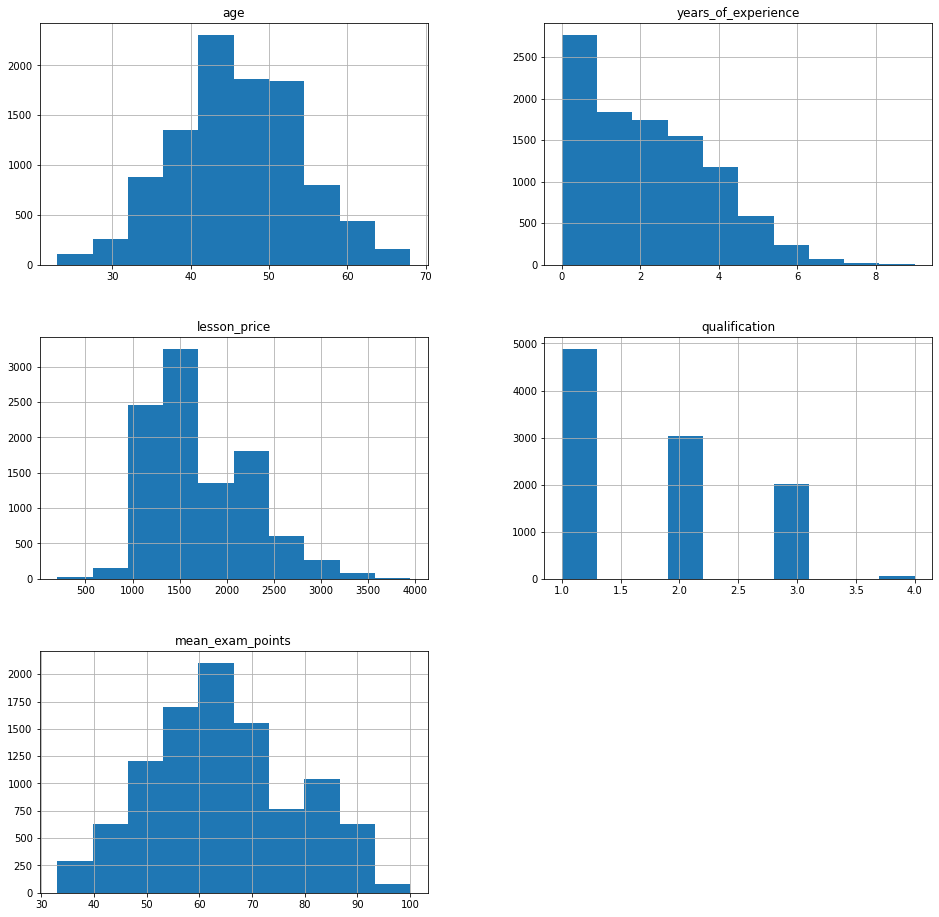

In [17]:
X.loc[:, feature_values].hist(figsize=(16, 16), bins=10, grid=True);

In [18]:
#Age, mean_exam_points распределены по нормальному закону. #Years_of_experience, qualification - нет 

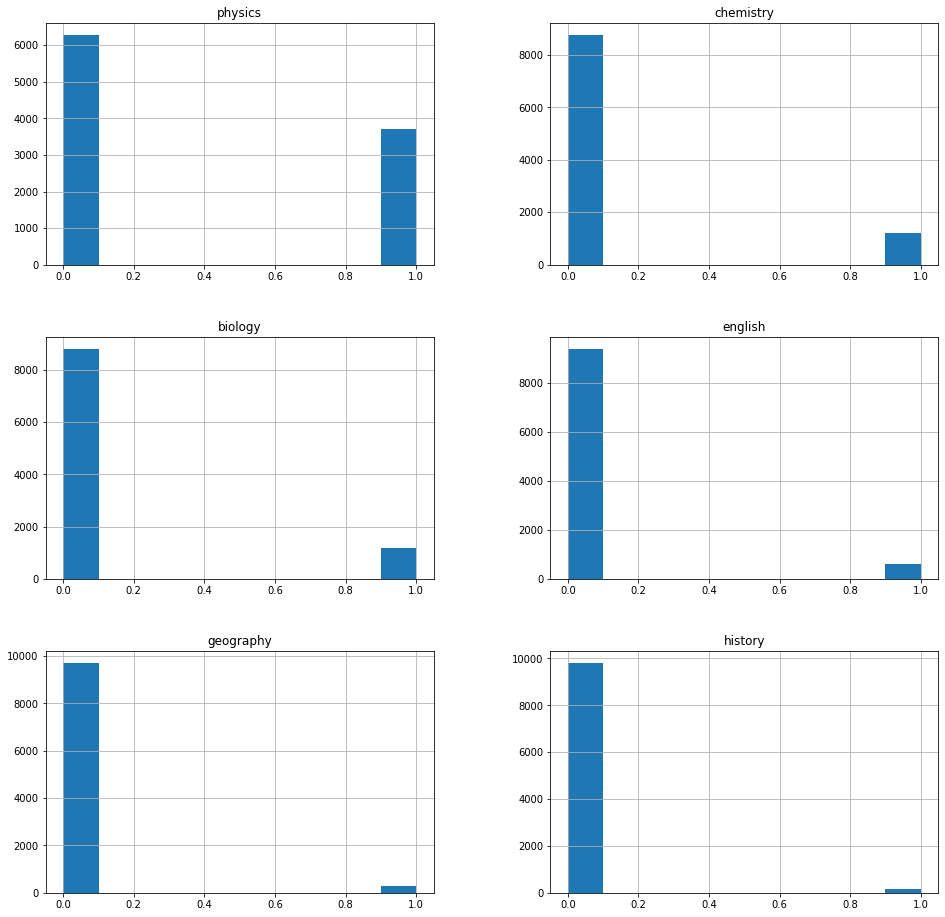

In [19]:
X.loc[:, subjects].hist(figsize=(16, 16), bins=10, grid=True);

In [20]:
#преподавателей по 'history', 'geography', 'english' совсем мало. Учтем это при дальнейшем построении пайплайна. 

In [21]:
X['history'].value_counts()

0.0    9820
1.0     180
Name: history, dtype: int64

In [22]:
X['english'].value_counts()

0.0    9409
1.0     591
Name: english, dtype: int64

In [23]:
X['geography'].value_counts()

0.0    9723
1.0     277
Name: geography, dtype: int64

In [24]:
# Английский все-таки оставим на борту, более 5% преподавателей. 

In [25]:
y.values

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [27]:
X.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000


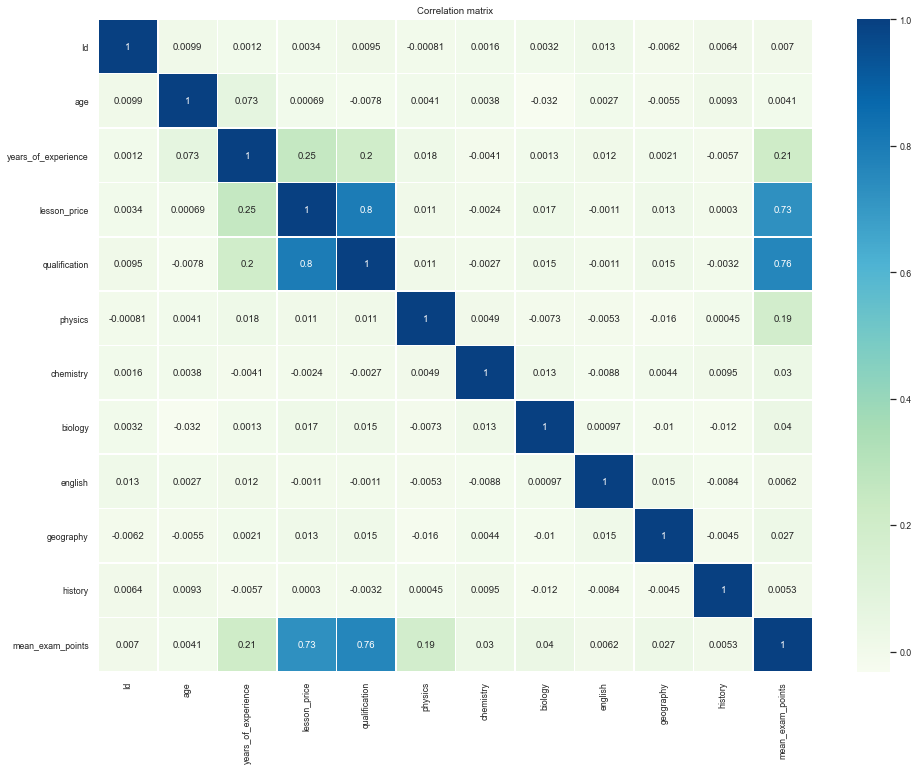

In [28]:
plt.figure(figsize=(16,12))
sns.set(font_scale=0.8)

cor = X.corr()
sns.heatmap(cor, annot=True, linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

In [40]:
!!pip install sklearn

['Collecting sklearn',
 '  Downloading https://files.pythonhosted.org/packages/1e/7a/dbb3be0ce9bd5c8b7e3d87328e79063f8b263b2b1bfa4774cb1147bfcd3f/sklearn-0.0.tar.gz',
 'Collecting scikit-learn (from sklearn)',
 '  Downloading https://files.pythonhosted.org/packages/92/db/8c50996186faed765392cb5ba495e8764643b71adbd168535baf0fcae5f1/scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl (6.8MB)',
 'Requirement already satisfied: numpy>=1.13.3 in c:\\users\\samsung\\miniconda3\\lib\\site-packages (from scikit-learn->sklearn) (1.19.2)',
 'Collecting joblib>=0.11 (from scikit-learn->sklearn)',
 '  Downloading https://files.pythonhosted.org/packages/fc/c9/f58220ac44a1592f79a343caba12f6837f9e0c04c196176a3d66338e1ea8/joblib-0.17.0-py3-none-any.whl (301kB)',
 'Requirement already satisfied: scipy>=0.19.1 in c:\\users\\samsung\\miniconda3\\lib\\site-packages (from scikit-learn->sklearn) (1.5.2)',
 'Collecting threadpoolctl>=2.0.0 (from scikit-learn->sklearn)',
 '  Downloading https://files.pythonhosted.or

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=55, stratify=y)

In [31]:
TARGET_NAME = 'choose'

In [32]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_for_balancing[TARGET_NAME].value_counts()

0    6224
1     776
Name: choose, dtype: int64

In [33]:
df_for_balancing

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
8243,8243,47.0,0.0,1350.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0
6341,6341,32.0,0.0,2200.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,72.0,0
5117,5117,68.0,1.0,1500.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0
5658,5658,49.0,1.0,1500.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,34.0,0
62,62,44.0,2.0,1750.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,72.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,9607,48.0,4.0,3100.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,94.0,0
5277,5277,66.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0
6400,6400,33.0,1.0,1800.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,73.0,0
9947,9947,46.0,2.0,2450.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,85.0,0


In [34]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1)

In [35]:
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
df_balanced[TARGET_NAME].value_counts()

0    6224
1    6208
Name: choose, dtype: int64

In [36]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

In [37]:
from sklearn import metrics
import random
random.seed(42)

def get_bootstrap(data, labels, N):
    n_samples = data.shape[0]
    bootstrap = []

    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        
        for j in range(n_samples):
            sample_index = random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(np.sqrt(len_sample))
    subsample = []
    
    random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction        

# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

# Расчет качества

def quality(left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    # выбор индекса из подвыборки длиной sqrt(n_features)
    subsample = get_subsample(n_features)
    
    for index in subsample:
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels, max_depth):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)
    
    if max_depth == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    max_depth -= 1
    true_branch = build_tree(true_data, true_labels, max_depth)
    false_branch = build_tree(false_data, false_labels, max_depth)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)


def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels, max_depth=5))
        
    return forest

# Функция классификации отдельного объекта

def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

# функция формирования предсказания по выборке на одном дереве

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

# предсказание голосованием деревьев

def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
    
    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [38]:
train_labels = y_train.values.reshape(1, -1)
valid_labels = y_test.values.reshape(1, -1)
train_data_arr = X_train.values
valid_data_arr = X_test.values

In [39]:
len(train_labels[0]), len(valid_labels[0]), len(train_data_arr), len(valid_labels[0])

(12432, 3000, 12432, 3000)

In [40]:
%%time
n_trees = 100 
my_forest_1 = random_forest(train_data_arr, train_labels[0], n_trees)

# Получим ответы для обучающей выборки 
train_answers = tree_vote(my_forest_1, train_data_arr)

# И получим ответы для валидационной выборки
valid_answers = tree_vote(my_forest_1, valid_data_arr)

# Точность на обучающей выборке
train_accuracy = accuracy_metric(train_labels[0], train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')

# Точность на тестовой выборке
valid_accuracy = accuracy_metric(valid_labels[0], valid_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {valid_accuracy:.3f}')

Точность случайного леса из 100 деревьев на обучающей выборке: 72.378
Точность случайного леса из 100 деревьев на тестовой выборке: 69.700
Wall time: 17h 25min 46s


In [41]:
fpr, tpr, threshold = metrics.roc_curve(train_labels[0], train_answers)
roc_auc_train = metrics.auc(fpr, tpr)

In [42]:
fpr2, tpr2, threshold2 = metrics.roc_curve(valid_labels[0], valid_answers)
roc_auc_test = metrics.auc(fpr2, tpr2)

In [43]:
roc_auc_train

0.7238189217660933

In [44]:
roc_auc_test

0.7021233832257454

In [45]:
df_test = pd.read_csv('C:/Users/Samsung/Desktop/kaggle_competition/test.csv', delimiter=',')

In [46]:
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


In [50]:
test_data = df_test.values

In [51]:
# И получим ответы для валидационной выборки
test_valid_answers = tree_vote(my_forest_1, test_data)

In [54]:
test_fin = pd.DataFrame({'Id': df_test['Id'],
                       'choose': test_valid_answers})

In [55]:
test_fin

,Id,choose
0,10000,0.0
1,10001,1.0
2,10002,0.0
3,10003,1.0
4,10004,1.0
...,...,...
9995,19995,1.0
9996,19996,1.0
9997,19997,1.0
9998,19998,1.0


In [56]:
test_fin.loc[:, ['Id', 'choose']].to_csv('choose_tutor3.csv', float_format='%.1f', index = False)

In [977]:
#реализация kmeans
class KMeans:
    def __init__(self, n_clusters=2, max_iterations=10, min_distance=1e-4):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.min_distance = min_distance
        
        
    def e_metrics(self, x1, x2):
        distance = 0
        for i in range(len(x1)):
            distance += np.square(x1[i] - x2[i])    
        return np.sqrt(distance)
    
    
    def fit(self, data):
        # инициализируем центроиды как случайные k элементов датасета
        centroids = [data[i] for i in range(self.n_clusters)] 
        
        for _ in range(self.max_iterations):
            # Создадим словарь для классификации
            classes = {i: [] for i in range(self.n_clusters)} 
            classes_ind = {i: [] for i in range(self.n_clusters)}
            
            # классифицируем объекты по центроидам            
            for i in range(len(data)):
                # определим расстояния от объекта до каждого центроида
                distances = [self.e_metrics(data[i], centroid) for centroid in centroids]
                
                # отнесем объект к кластеру, до центроида которого наименьшее расстояние
                classification = distances.index(min(distances))
                classes[classification].append(data[i])
                classes_ind[classification].append(i)
                
            # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
            old_centroids = centroids.copy()
            
            # пересчитаем центроиды как среднее по кластерам
            
            for classification in classes:                
                centroids[classification] = np.average(classes[classification], axis=0)
                                        
            # сравним величину смещения центроидов с минимальной
            optimal = True
            for centroid in range(len(centroids)):
                if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > self.min_distance:
                    optimal = False

            # если все смещения меньше минимального, останавливаем алгоритм  
            if optimal:
                break
                
        cluster_labels = np.zeros(data.shape[0])
        for i in range(1, self.n_clusters):            
            cluster_labels[classes_ind[i]] = i
            
        self.centroids = old_centroids
        self.clusters = classes
        self.labels_ = cluster_labels

In [978]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(np.array(X[subjects]))
X.loc[:, 'Cluster_kmeans'] = kmeans.labels_ 

C:\Users\Anatoly\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Anatoly\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


In [979]:
X['Cluster_kmeans']

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: Cluster_kmeans, Length: 10000, dtype: float64

In [272]:
df = pd.read_csv('C:/Users/Anatoly/Desktop/algods/kaggle_competition/train.csv', delimiter=',')

In [1077]:
# Calculate information value and woe
def calc_woe(df, feature, target):


    lst = []

    for i in range(len(df[feature])):
        val = df[feature][i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data[f'Share_{feature}'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data[f'WoE_{feature}'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({f'WoE_{feature}': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data[f'WoE_{feature}'] * (data['Distribution Good'] - data['Distribution Bad'])

    data.index = range(len(data.index))


    iv = data['IV'].sum()
    # print(iv)

    return data[[f'WoE_{feature}', f'Share_{feature}']]

In [1078]:
data_woe_age = calc_woe(df, feature='age', target='choose')

In [1079]:
data_woe_age 

,WoE_age,Share_age
0,-0.002654,0.000055
1,-0.099388,0.000103
2,0.010204,0.000013
3,-0.324149,0.000045
4,0.070351,0.000133
...,...,...
9995,-0.410384,0.000071
9996,-0.130748,0.000095
9997,-0.103042,0.000141
9998,0.106140,0.000112


In [1080]:
data_woe_years_of_experience = calc_woe(df, feature='years_of_experience', target='choose')

In [1081]:
data_woe_years_of_experience

,WoE_years_of_experience,Share_years_of_experience
0,0.027084,0.000152
1,-0.103271,0.000095
2,-0.042249,0.000084
3,-0.042249,0.000084
4,-0.042249,0.000084
...,...,...
9995,-0.103271,0.000095
9996,-0.103271,0.000095
9997,-0.023822,0.000032
9998,0.027084,0.000152


In [1082]:
data_lesson_price = calc_woe(df, 'lesson_price', target='choose')

In [1083]:
data_lesson_price

,WoE_lesson_price,Share_lesson_price
0,0.626933,0.000088
1,-0.310754,0.000128
2,0.205416,0.000089
3,-1.079941,0.000033
4,-0.467693,0.000097
...,...,...
9995,0.626933,0.000088
9996,-0.216649,0.000141
9997,0.205416,0.000089
9998,0.033795,0.000094


In [1084]:
data_qualification = calc_woe(df, 'qualification', target = 'choose')

In [1085]:
    data_qualification_chemistry = calc_woe(df, 'chemistry', target = 'choose')

In [1086]:
data_qualification_biology = calc_woe(df, 'biology', target = 'choose')

In [1150]:
data_qualification_physics = calc_woe(df, 'physics', target = 'choose')

In [1087]:
data_qualification_english = calc_woe(df, 'english', target = 'choose')

In [1088]:
fin = pd.concat([df['Id'], data_woe_age, data_woe_years_of_experience, data_lesson_price, data_qualification,
                 data_qualification_chemistry, data_qualification_biology, data_qualification_english, X['Cluster_kmeans']],
                axis=1)

In [1089]:
fin

,Id,WoE_age,Share_age,WoE_years_of_experience,Share_years_of_experience,WoE_lesson_price,Share_lesson_price,WoE_qualification,Share_qualification,WoE_chemistry,Share_chemistry,WoE_biology,Share_biology,WoE_english,Share_english,Cluster_kmeans
0,0,-0.002654,0.000055,0.027084,0.000152,0.626933,0.000088,0.025216,0.000082,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0
1,1,-0.099388,0.000103,-0.103271,0.000095,-0.310754,0.000128,0.025216,0.000082,0.018254,0.000112,-0.585090,0.000015,0.001196,0.000106,1.0
2,2,0.010204,0.000013,-0.042249,0.000084,0.205416,0.000089,0.041027,0.000131,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0
3,3,-0.324149,0.000045,-0.042249,0.000084,-1.079941,0.000033,0.041027,0.000131,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0
4,4,0.070351,0.000133,-0.042249,0.000084,-0.467693,0.000097,0.025216,0.000082,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,-0.410384,0.000071,-0.103271,0.000095,0.626933,0.000088,0.025216,0.000082,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0
9996,9996,-0.130748,0.000095,-0.103271,0.000095,-0.216649,0.000141,0.041027,0.000131,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0
9997,9997,-0.103042,0.000141,-0.023822,0.000032,0.205416,0.000089,0.041027,0.000131,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0
9998,9998,0.106140,0.000112,0.027084,0.000152,0.033795,0.000094,0.025216,0.000082,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0


In [1151]:
fin_ = pd.concat([fin, data_qualification_physics], axis = 1)

In [1152]:
fin_

,Id,WoE_age,Share_age,WoE_years_of_experience,Share_years_of_experience,WoE_lesson_price,Share_lesson_price,WoE_qualification,Share_qualification,WoE_chemistry,Share_chemistry,WoE_biology,Share_biology,WoE_english,Share_english,Cluster_kmeans,WoE_physics,Share_physics
0,0,-0.002654,0.000055,0.027084,0.000152,0.626933,0.000088,0.025216,0.000082,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0,0.448631,0.000118
1,1,-0.099388,0.000103,-0.103271,0.000095,-0.310754,0.000128,0.025216,0.000082,0.018254,0.000112,-0.585090,0.000015,0.001196,0.000106,1.0,-0.791264,0.000069
2,2,0.010204,0.000013,-0.042249,0.000084,0.205416,0.000089,0.041027,0.000131,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0,-0.791264,0.000069
3,3,-0.324149,0.000045,-0.042249,0.000084,-1.079941,0.000033,0.041027,0.000131,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0,0.448631,0.000118
4,4,0.070351,0.000133,-0.042249,0.000084,-0.467693,0.000097,0.025216,0.000082,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0,-0.791264,0.000069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,-0.410384,0.000071,-0.103271,0.000095,0.626933,0.000088,0.025216,0.000082,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0,-0.791264,0.000069
9996,9996,-0.130748,0.000095,-0.103271,0.000095,-0.216649,0.000141,0.041027,0.000131,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0,0.448631,0.000118
9997,9997,-0.103042,0.000141,-0.023822,0.000032,0.205416,0.000089,0.041027,0.000131,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0,0.448631,0.000118
9998,9998,0.106140,0.000112,0.027084,0.000152,0.033795,0.000094,0.025216,0.000082,0.018254,0.000112,0.013012,0.000111,0.001196,0.000106,0.0,-0.791264,0.000069


In [1153]:
from sklearn import metrics

# Модель алгоритма

In [850]:
# Реализация алгоритма случайный лес. Hint - можно пропустить, взято из семинара. 

In [851]:
# Реализуем генерацию  N  бутстрап-выборок и подмножества признаков для нахождения разбиения в узле

random.seed(42)

def get_bootstrap(data, labels, N):
    n_samples = data.shape[0]
    bootstrap = []
    
    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        
        for j in range(n_samples):
            sample_index = random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [852]:
# Далее повторим реализацию построения дерева решений из предыдущего урока с некоторыми изменениями
#+++
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [853]:
# И класс терминального узла (листа)
#+++
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        z = np.mean(self.labels)
        return 1 / (1 + np.exp(-z))

In [854]:
# Расчет критерия Джини
#+++
def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [855]:
# Расчет качества
#+++
def quality(left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [856]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [857]:
#+++
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(np.sqrt(len_sample))
    subsample = []
    
    random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

In [858]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 12

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    # выбор индекса из подвыборки длиной sqrt(n_features)
    subsample = get_subsample(n_features)
    
    for index in subsample:
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [859]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [860]:
# Теперь добавим функцию формирования случайного леса.

def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels))
        
    return forest

In [861]:
# Функция классификации отдельного объекта

def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [862]:
# функция формирования предсказания по выборке на одном дереве

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [863]:
# предсказание голосованием деревьев

def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
    
    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions

In [872]:
def forest_result(n_trees):
    
    my_forest = random_forest(np.array(train_data), np.array(train_labels), n_trees)
    
    train_answers = tree_vote(my_forest, np.array(train_data))
    test_answers = tree_vote(my_forest, np.array(test_data))
    # Получим ответы для обучающей выборки 
    fpr4, tpr4, threshold4 = metrics.roc_curve(train_labels, train_answers)
    roc_auc_train = metrics.auc(fpr4, tpr4)
    # И получим ответы для тестовой выборки
    fpr3, tpr3, threshold3 = metrics.roc_curve(test_labels, test_answers)
    roc_auc_test = metrics.auc(fpr3, tpr3)
    
    return roc_auc_train, roc_auc_test

In [873]:
forest_result(50)

(0.6943957999297696, 0.5656488884835342)

In [1049]:
from sklearn import metrics

In [1154]:
X_fin = pd.DataFrame.to_numpy(fin_)

In [1155]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X_fin, axis=0)
stds = np.std(X_fin, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X_fin.shape[0]):
    for j in range(X_fin.shape[1]):
        X_fin[i][j] = (X_fin[i][j] - means[j])/stds[j]

In [1156]:
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, shuffle = True, test_size=0.3)

In [1197]:
X_train_tr = X_train.transpose()
X_test_tr = X_test.transpose()

In [1198]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [1199]:
def calc_logloss(y, y_pred):    
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [1203]:
def eval_model(X, y, iterations, alpha=1e-4, lambda_=1):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)) + lambda_*W
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [1204]:
W = eval_model(X_train_tr, y_train, iterations=10000, alpha=1e-3, lambda_ = 1)

1000 [ 2.18523237e-06 -1.96349489e-05 -3.50336560e-06 -1.61190685e-05
 -1.23366708e-05 -6.35899750e-05 -9.99618557e-06 -2.06291617e-05
 -9.87296229e-06 -2.92719180e-05 -2.92719180e-05 -2.94173097e-05
 -2.94173097e-05 -5.60194617e-06 -5.60194617e-06  2.94173097e-05
 -7.12594446e-05 -7.12594446e-05] 0.6931271661746861
2000 [ 2.18523237e-06 -1.96349489e-05 -3.50336560e-06 -1.61190685e-05
 -1.23366708e-05 -6.35899750e-05 -9.99618557e-06 -2.06291617e-05
 -9.87296229e-06 -2.92719180e-05 -2.92719180e-05 -2.94173097e-05
 -2.94173097e-05 -5.60194617e-06 -5.60194617e-06  2.94173097e-05
 -7.12594446e-05 -7.12594446e-05] 0.6931271661746861
3000 [ 2.18523237e-06 -1.96349489e-05 -3.50336560e-06 -1.61190685e-05
 -1.23366708e-05 -6.35899750e-05 -9.99618557e-06 -2.06291617e-05
 -9.87296229e-06 -2.92719180e-05 -2.92719180e-05 -2.94173097e-05
 -2.94173097e-05 -5.60194617e-06 -5.60194617e-06  2.94173097e-05
 -7.12594446e-05 -7.12594446e-05] 0.6931271661746861
4000 [ 2.18523237e-06 -1.96349489e-05 -3.50336

In [1205]:
W

array([ 2.18523237e-06, -1.96349489e-05, -3.50336560e-06, -1.61190685e-05,
       -1.23366708e-05, -6.35899750e-05, -9.99618557e-06, -2.06291617e-05,
       -9.87296229e-06, -2.92719180e-05, -2.92719180e-05, -2.94173097e-05,
       -2.94173097e-05, -5.60194617e-06, -5.60194617e-06,  2.94173097e-05,
       -7.12594446e-05, -7.12594446e-05])

In [1206]:
def predict(w, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    
    return y_predicted, A

In [1207]:
y_predicted_train = predict(W, X_train_tr)
y_predicted_test = predict(W, X_test_tr)

In [1208]:
y_predicted_train_ = pd.DataFrame(y_predicted_train[1][0])

In [1209]:
from sklearn import metrics

In [1210]:
fpr, tpr, threshold = metrics.roc_curve(y_train, y_predicted_train[1][0])
roc_auc_train = metrics.auc(fpr, tpr)

In [1211]:
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, y_predicted_test[1][0])
roc_auc_test = metrics.auc(fpr2, tpr2)

In [1212]:
print(f'roc_auc_train = {roc_auc_train}, y_predicted_test = {roc_auc_test}')

roc_auc_train = 0.7617019127710446, y_predicted_test = 0.717679136145405


In [1213]:
TP, FP, TN, FN = 0,0,0,0

for pred, true in zip(y_predicted_train[0][0], y_train):
    if pred == 1:
        if true == 1:
            TP+=1
        else:
            FP+=1
    else:
        if true == 1:
            FN+=1
        else:
            TN+=1
            
print(TP, FP, TN, FN)

627 2763 3457 153


In [1214]:
false_positive_rate = FP / (FP + TN)
true_positive_rate = TP / (TP + FN)

print(f'{false_positive_rate}\n{true_positive_rate}')

0.4442122186495177
0.8038461538461539


In [1215]:
from numpy import trapz

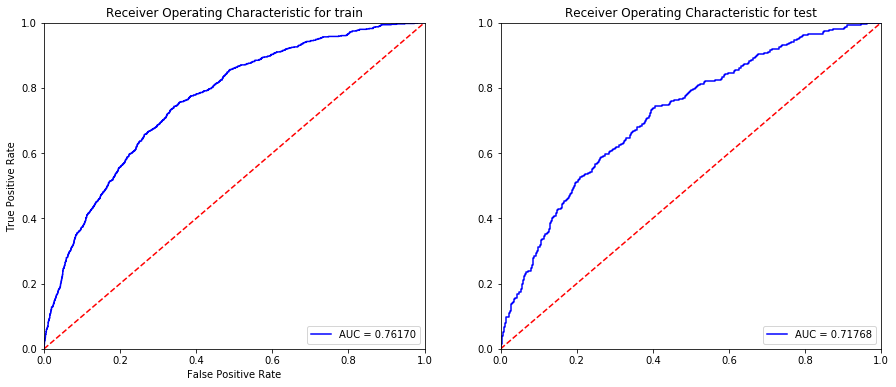

In [1216]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,6)
ax1, ax2 = ax.flatten()
ax1.set_title('Receiver Operating Characteristic for train')
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc_train)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')

ax2.set_title('Receiver Operating Characteristic for test')
ax2.plot(fpr2, tpr2, 'b', label = 'AUC = %0.5f' % roc_auc_test)
ax2.legend(loc = 'lower right')
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])

plt.show()

In [1174]:
AUC_ROC = trapz(tpr, fpr, dx=0.1)

In [1175]:
AUC_ROC 

0.7889774507379009

In [1176]:
AUC_ROC2 = trapz(tpr2, fpr2, dx=0.1)

In [1177]:
AUC_ROC2

0.7468202317131318

Теперь сделаем предсказание для тестового датасета. 

In [1136]:
df_test = pd.read_csv('C:/Users/Anatoly/Desktop/algods/kaggle_competition/test.csv', delimiter=',')

In [1141]:
df_test

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,44.0,3.0,1850.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,68.0
9996,19996,45.0,3.0,2450.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,72.0
9997,19997,44.0,2.0,1250.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,63.0
9998,19998,51.0,5.0,1000.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,64.0


In [1137]:
y

0       0
1       1
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: choose, Length: 10000, dtype: int64

In [1143]:
df_test_final = pd.concat([df_test, y], axis = 1)

In [1145]:
test_woe_age = calc_woe(df_test_final, 'age', target = 'choose')

In [1146]:
test_woe_years_of_experience = calc_woe(df_test_final, 'years_of_experience', target = 'choose')

In [1147]:
test_qualification_english = calc_woe(df_test_final, 'english', target = 'choose')

In [1148]:
test_lesson_price = calc_woe(df_test_final, 'lesson_price', target = 'choose')

In [1149]:
test_qualification = calc_woe(df_test_final, 'qualification', target = 'choose')

In [1178]:
test_chemistry = calc_woe(df_test_final, 'chemistry', target = 'choose')

In [1179]:
test_biology = calc_woe(df_test_final, 'biology', target = 'choose')

In [1180]:
test_physics = calc_woe(df_test_final, 'physics', target = 'choose')

In [1182]:
fin = pd.concat([df_test_final['Id'], test_woe_age, test_woe_years_of_experience, test_lesson_price, test_qualification,
                 test_chemistry, test_biology, test_qualification_english, test_physics],
                axis=1)

In [1183]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(np.array(df_test[subjects]))
df_test.loc[:, 'Cluster_kmeans'] = kmeans.labels_ 

C:\Users\Anatoly\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Anatoly\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


In [1185]:
df_test['Cluster_kmeans']

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
9995    1.0
9996    1.0
9997    1.0
9998    0.0
9999    1.0
Name: Cluster_kmeans, Length: 10000, dtype: float64

In [1186]:
fin_ = pd.concat([fin, df_test['Cluster_kmeans']],
                axis=1)

In [1187]:
test_ = pd.DataFrame.to_numpy(fin_)

In [1188]:
for i in range(test_.shape[0]):
    for j in range(test_.shape[1]):
        test_[i][j] = (test_[i][j] - means[j])/stds[j]

In [1189]:
final_answers = predict(W, test_.T)[1]

In [1194]:
test_fin = pd.DataFrame({'Id': df_test['Id'],
                       'choose': final_answers[0]})

In [1195]:
test_fin

,Id,choose
0,10000,0.092311
1,10001,1.000000
2,10002,0.080177
3,10003,0.095768
4,10004,0.110207
...,...,...
9995,19995,1.000000
9996,19996,1.000000
9997,19997,1.000000
9998,19998,0.100351


In [1196]:
test_fin.loc[:, ['Id', 'choose']].to_csv('choose_tutor.csv', float_format='%.2f', index = False)

In [ ]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [ ]:
def eval_model(X, y, iterations, alpha):
    """
    Реализация градиентного спуска с подсчетом логарифмической функции потерь
    
    X: матрица признаков
    y: истинные значения таргета
    
    returns: массив ошибок

    """
    
    np.random.seed(27)
    n = X.shape[1]
    W = np.random.randn(X.shape[0])
    errors = []
    weights = []
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)) 
        
        weights.append(W)
        errors.append(err)
        
        if (i > 2) and ((self.err_history[-2] - err) < 1e-3):
            break

    return W, errors

In [ ]:
def predict(w, X):
    
    X = scale(X)
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
         За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    
    return y_predicted

In [619]:
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 1000
eta = 0.05


w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_test = predict(w, np.array(X_test_tr))
y_predicted_train = predict(w, np.array(X_train_tr))

In [629]:
y_pred = pd.DataFrame(y_predicted_train)

In [633]:
metrics(y_train.T, y_pred.T)
# 0.774085469046099

ROC =  0.5795863354918473


In [621]:
metrics(y_test_tr.T, y_predicted_test.T)
# 0.7670065251530196

AttributeError: 'numpy.ndarray' object has no attribute 'values'

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle=True,
                                                    stratify = y,
                                                    test_size=0.5, random_state=42)

model_lr = LogisticRegression()
model_lr.fit(X_train[SELECTED_FEATURE_NAMES], np.array(y_train))

y_pred_train_lr = model_lr.predict(X_train[SELECTED_FEATURE_NAMES])
y_pred_test_lr = model_lr.predict(X_test[SELECTED_FEATURE_NAMES])